# Regressão Logística
## Uma construção intuitiva baseada em regressão linear

Vimos em regressão linear como explicar uma variável quantitativa Y por meio de uma matrix de dados X de forma que $Y = \underset{\sim}{\hat{\beta}}*\underset{\sim}{X} + \underset{\sim}{\epsilon}$, sendo que $Y \sim N\left(\underset{\sim}{\hat{\beta}}*\underset{\sim}{X}, \sigma^2\right)$

<img src = "./imgs/reg_lin_eq.png" width = "50%"></img>

mas e quando temos uma variável dependente indicando ação? 

por exemplo.: 
- Comprar um item
- Ser cliente
- Abandonar a empresa
- Dar default em linha de crédito ou sinistro de veículo
- Processar uma instituição

ou seja, quando olhamos os dados coletamos vemos de forma gráfica o seguinte

<img src = "./imgs/reg_log_bin.png" width = "50%"></img>

Neste caso notamos que a proporção $p$ de pessoas que, por exemplo, compram um carro, tende a aumentar conforme a idade aumenta, pois o volume de pontos em 1 aumenta.

Porderíamos tentar usar a regressão linear para esplicar o fenomeno e teríamos a seguinte reta ajustada.

<img src = "./imgs/reg_log_bin_line.png" width = "50%"></img>

Porém nossos valores são limitados no eixo Y, dado que assumem apenas os valores 0 ou 1, e portanto permitir valores além desses extremos não faz sentido. Apartir disso poderíamos truncar esses valores de forma a obter o seguinte ajuste.

<img src = "./imgs/reg_log_bin_line_trunc.png" width = "50%"></img>

Sendo que

$$
Y =
  \begin{cases}
    0       & \quad \forall x \ | \ \beta_0 + \beta_1*X & \in (-\infty;0) \\
    \beta_0 + \beta_1*X & \quad \forall x \ | \ \beta_0 + \beta_1*X & \in [0;1] \\
    1       & \quad \forall x \ |\  \beta_0 + \beta_1*X & \in (1; \infty)
  \end{cases}
$$

Note a dificuldade em se escrever Y nessa situação e como que essa função perde propridades importantes como continuidade. Além disso o meio da reta ainda não parece se ajustar muito bem, de forma que o ideal seriamos traçar uma curva como a seguinte:

<img src = "./imgs/reg_log_log.png" width = "50%"></img>

A essa curva chamamos de sigmoíde, ou curva sigmoídal. E pode ser escrita de duas maneiras:

$$p = \dfrac{1}{1+e^{\beta_0 + \beta_1*X}} = \dfrac{1}{1+e^Y}$$

$$Y = ln\left(\dfrac{p}{1-p}\right) = {\beta_0 + \beta_1*X}$$

Apartir do ajuste dos parâmetros dessa curva podemos calcular a probabilidade de cada valor de X ocorrer.

<img src = "./imgs/reg_log_log_prob.png" width = "50%"></img>

E, apartir de algum valor arbitrário de corte, por exemplo 50%, podemos predizar a ação representada pela varíavel

<img src = "./imgs/reg_log_log_y.png" width = "50%"></img>

De forma análoga, para o caso multivariado, temos que

$$p = \dfrac{1}{1+e^{\underset{\sim}{\hat{\beta}}*\underset{\sim}{X}}} = \dfrac{1}{1+e^Y}$$

$$Y = ln\left(\dfrac{p}{1-p}\right) = \underset{\sim}{\hat{\beta}}*\underset{\sim}{X}$$

## Em Python

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Importing the dataset
dataset = pd.read_csv("./data/Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

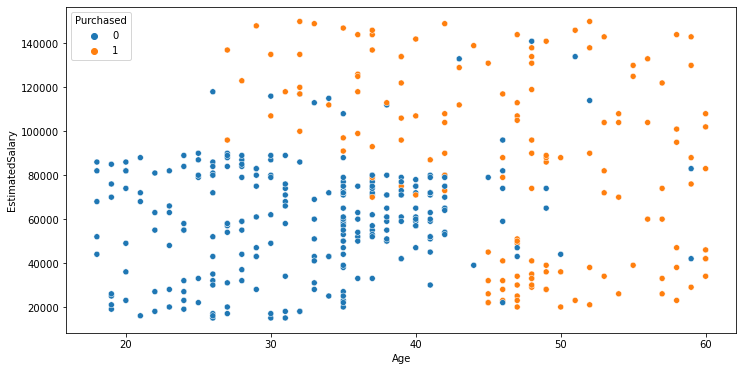

In [5]:
# Scatter
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data = dataset, x = "Age", y="EstimatedSalary", hue = "Purchased")

In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
# Fit
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [18]:
len(y_pred)

100

In [16]:
# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[56,  7],
       [10, 27]])

In [20]:
# report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        63
           1       0.79      0.73      0.76        37

    accuracy                           0.83       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.83      0.83      0.83       100



In [21]:
# metrics
metrics.roc_auc_score(y_test,y_pred)

0.8093093093093093

In [22]:
def plot_classification_region(X_set, y_set, title, xlabel, ylabel):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    fig, ax = plt.subplots(figsize=(16,9))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


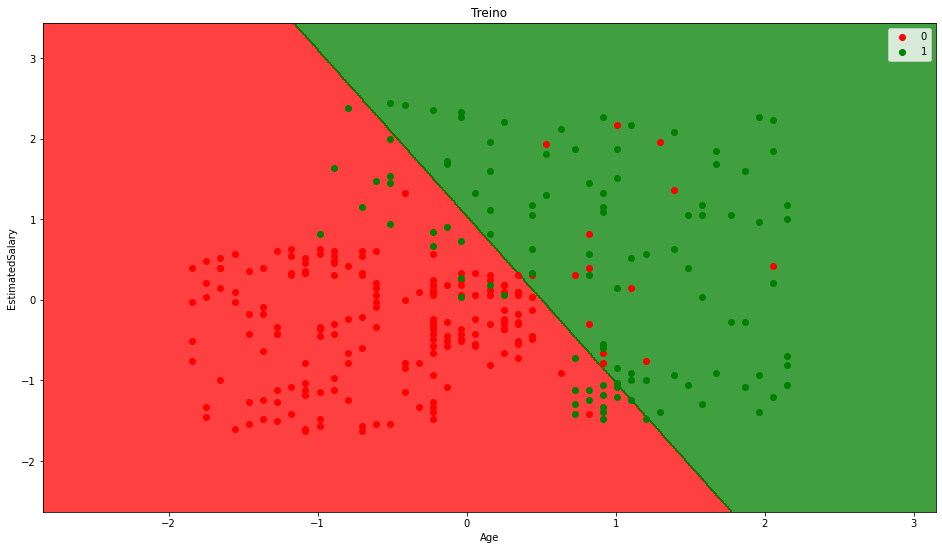

In [23]:
plot_classification_region(X_train,
                           y_train,
                           title = "Treino",
                           xlabel = "Age",
                           ylabel = "EstimatedSalary")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


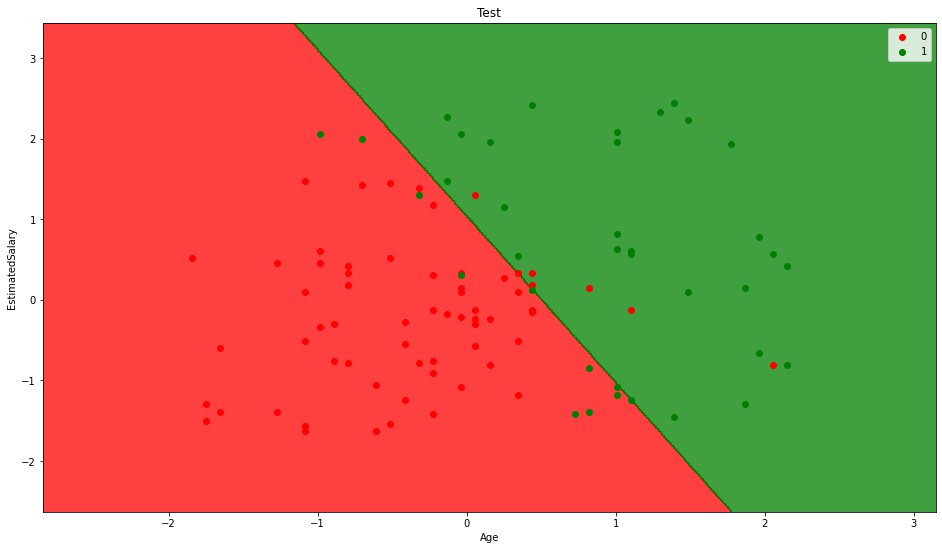

In [24]:
plot_classification_region(X_test,
                           y_test,
                           title = "Test",
                           xlabel = "Age",
                           ylabel = "EstimatedSalary")

# Exercício

A partir das características apresentadas no dataset abaixo, crie um modelo de classificação para predizer se uma pessoa é ou não diabética.

In [2]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

data = pd.read_csv("./data/diabetes.csv", header=0, names=col_names)
data

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
